In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
assess = pd.read_csv('Property_Assessment__Customer_Service__-_Edmonton_Insight_Community.csv')

In [3]:
assess.Q3_CityContact.unique()

array(["I don't recall", 'I haven’t contacted the City',
       'Within the last three years', nan, 'Within the last year',
       'Within the last 6 months', 'Within the last 3 months'],
      dtype=object)

In [4]:
dfnull = assess[assess.Q3_CityContact.isnull()]

print('The number of null responces for City Contact is = {}'.format(len(dfnull)))

The number of null responces for City Contact is = 367


In [5]:
df_norecall = assess[assess.Q3_CityContact == "I don't recall"]

print('The number of no recall responces for City Contact is = {}'.format(len(df_norecall)))

The number of no recall responces for City Contact is = 157


In [6]:
df_nocontact = assess[assess.Q3_CityContact == "I haven’t contacted the City"]

print('The number of no contact responces for City Contact is = {}'.format(len(df_nocontact)))

The number of no contact responces for City Contact is = 1468


In [7]:
df_contact = assess[~assess.Q3_CityContact.isnull()]
df_contact = df_contact[~(df_contact.Q3_CityContact == "I don't recall")]
df_contact = df_contact[~(df_contact.Q3_CityContact == "I haven’t contacted the City")]

print('The number of contact responces for City Contact is = {}'.format(len(df_contact)))

The number of contact responces for City Contact is = 305


In [8]:
assign = assess['Q5_CommsAgreement_The City’s assessment team does a good job assigning property values']
fair = assess['Q5_CommsAgreement_The assessed value of my property is fair']
accurate = assess['Q5_CommsAgreement_The assessed value of my property is accurate']
info = assess['Q5_CommsAgreement_Overall, I’m satisfied with access to property assessment information']

assign = assign.sort_values()
fair = fair.sort_values()
accurate = accurate.sort_values()
info = info.sort_values()

In [9]:
dfnull2 = assign.isnull()
dfnull3 = fair.isnull()
dfnull4 = accurate.isnull()
dfnull5 = info.isnull()

print('The number of null responces for: \nThe City’s assessment team does a good job assigning property values is = \n{}'.format(len(dfnull2)))
print('\nThe number of null responces for: \nThe assessed value of my property is fair is = \n{}'.format(len(dfnull3)))
print('\nThe number of null responces for: \nThe assessed value of my property is accurate is = \n{}'.format(len(dfnull4)))
print('\nThe number of null responces for: \nOverall, I’m satisfied with access to property assessment information is = \n{}'.format(len(dfnull5)))

The number of null responces for: 
The City’s assessment team does a good job assigning property values is = 
2297

The number of null responces for: 
The assessed value of my property is fair is = 
2297

The number of null responces for: 
The assessed value of my property is accurate is = 
2297

The number of null responces for: 
Overall, I’m satisfied with access to property assessment information is = 
2297


In [10]:
# Remove the 305 null responses in the dataset
assign = assign[~assign.isnull()]
fair = fair[~fair.isnull()]
accurate = accurate[~accurate.isnull()]
info = info[~info.isnull()]

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


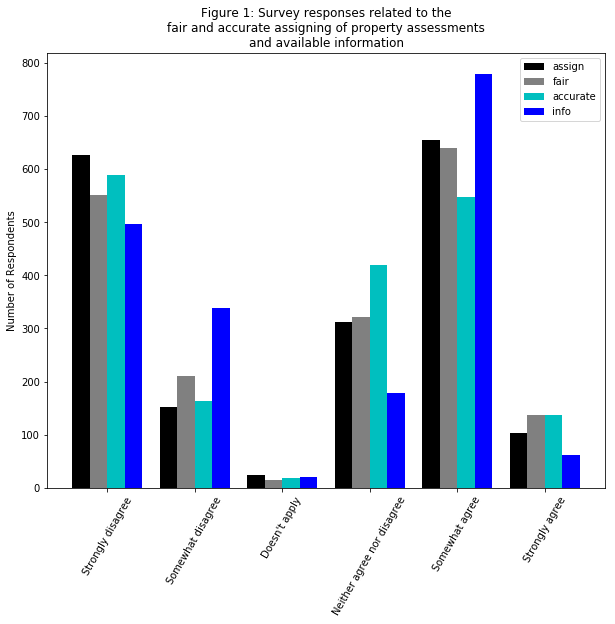

In [11]:
import matplotlib.pyplot as plt

labels = ['Strongly disagree', 'Somewhat disagree', "Doesn't apply", 
          "Neither agree nor disagree", 'Somewhat agree', 'Strongly agree']

def create_x(t, w, n, d):
    '''n is n dataset (out of t)
    t is Number of datasets
    d is Number of sets of bars
    w is Width of each bar'''
    
    return [t*x + w*n for x in range(d)]

plt.figure(figsize=(10,8))

store1_x = create_x(4, 0.8, 1, 6)
_ = plt.bar(store1_x, assign.value_counts(sort=False).values, label='assign', color='k')

store2_x = create_x(4, 0.8, 2, 6)
_ = plt.bar(store2_x, fair.value_counts(sort=False).values, label='fair', color='grey')

store3_x = create_x(4, 0.8, 3, 6)
_ = plt.bar(store3_x, accurate.value_counts(sort=False).values, label='accurate', color='c')

store4_x = create_x(4, 0.8, 4, 6)
_ = plt.bar(store4_x, info.value_counts(sort=False).values, label='info', color='b')

#create your ax object here
ax = plt.subplot()
middle_x = [(a + b + c + d) / 4.0 for a, b, c, d in zip(store1_x, store2_x, store3_x, store4_x)]
_ = ax.set_xticks(middle_x)
_ = ax.set_xticklabels(labels,rotation=60)

_ = plt.title('Figure 1: Survey responses related to the\n\
fair and accurate assigning of property assessments\n\
and available information')

_ = plt.ylabel('Number of Respondents')

_ = plt.legend()

plt.show()

# Figure 1 Analysis

The above graph visualizes the following survey questions:
- **assign**: The City’s assessment team does a good job assigning property values
- **fair**: The assessed value of my property is fair
- **accurate**: The assessed value of my property is accurate
- **info**: Overall, I’m satisfied with access to property assessment information

We can see from the responses that those respondents that took a negative position (strongly or somewhat disagree) significantly outnumber the respondents who took a positive position (somewhat or strongly agree). In the next section we will look at a hypothesis test to extend this to all Edmonton property owners.

In [12]:
df_assign = pd.DataFrame(assign)
df_assign['q'] = 'assignment'
df_assign.columns = ['response', 'question']

df_fair = pd.DataFrame(fair)
df_fair['q'] = 'fairness'
df_fair.columns = ['response', 'question']

df_accuracy = pd.DataFrame(accurate)
df_accuracy['q'] = 'accuracy'
df_accuracy.columns = ['response', 'question']

df_information = pd.DataFrame(info)
df_information['q'] = 'information'
df_information.columns = ['response', 'question']

df_list = [df_fair, df_accuracy, df_information]
df = df_assign.append(df_list, ignore_index=True)
df['count'] = 1

df_pivot = df.pivot_table(values='count', index='question', columns='response', aggfunc='sum')
df_reset = df_pivot.reset_index()

df_plot = df_reset.melt(id_vars='question', value_name='response count')

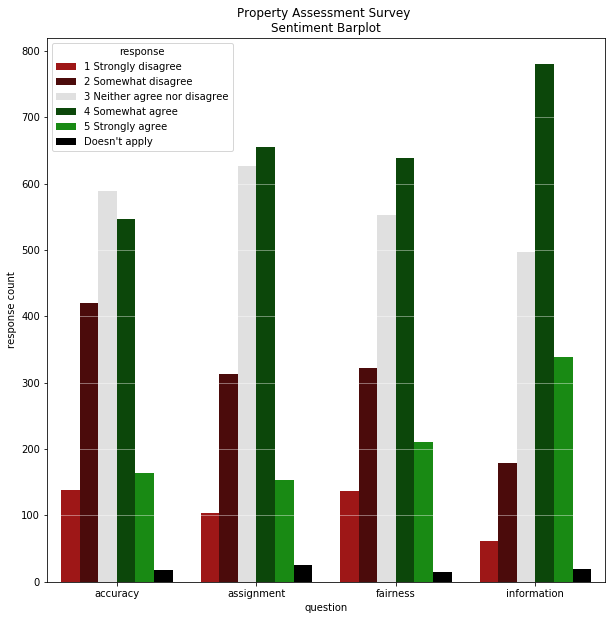

In [13]:
gradient = ["#b50000", "#560000", "#e0e0e0", "#035100", "#079e00", "#000000"]

plt.figure(figsize=(10, 10))
ax = sns.barplot(x="question", y="response count", hue="response", 
                 data=df_plot, palette=gradient)
ax = plt.grid(axis='y', alpha=0.5, color='w')
ax = plt.title('Property Assessment Survey \nSentiment Barplot')

plt.show()

In [14]:
df_piv = df.pivot_table(values='count', index='response', columns='question', aggfunc='sum')
df_reset = df_piv.reset_index()

In [15]:
total = df_piv['accuracy'].sum()
percentage_a = [i / total for i in df_piv['accuracy']]
percentage_a

total = df_piv['assignment'].sum()
percentage_as = [i / total for i in df_piv['assignment']]

total = df_piv['fairness'].sum()
percentage_f = [i / total for i in df_piv['fairness']]

total = df_piv['information'].sum()
percentage_i = [i / total for i in df_piv['information']]

In [16]:
df = pd.DataFrame(percentage_a)
df[1] = percentage_as
df[2] = percentage_f
df[3] = percentage_i
df

def percent_calc(n):
    l = [df[n][0]]
    ind = 0
    for i in range(5):
        p = l[ind] + df[n][ind + 1]
        l.append(p)
        ind += 1
    return l

accuracy_bars = percent_calc(0)
assignment_bars = percent_calc(1)
fairness_bars = percent_calc(2)
information_bars = percent_calc(3)

df = pd.DataFrame(accuracy_bars)
df[1] = assignment_bars
df[2] = fairness_bars
df[3] = information_bars
df = df.T
df[6] = ['accuracy', 'assignment', 'fairness', 'information']

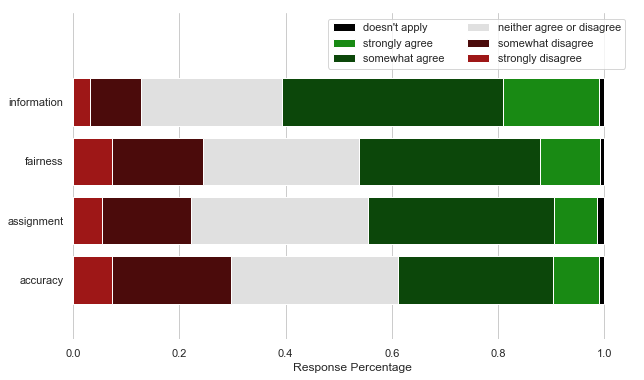

In [18]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the doesn't apply responses
sns.barplot(x=5, y=6, data=df,
            label="doesn't apply", color="#000000")

# Plot the strongly agree responses
sns.barplot(x=4, y=6, data=df,
            label="strongly agree", color="#079e00")

# Plot the somewhat agree responses
sns.barplot(x=3, y=6, data=df,
            label="somewhat agree", color="#035100")

# Plot the neither agree or disagree responses
sns.barplot(x=2, y=6, data=df,
            label="neither agree or disagree", color="#e0e0e0")

# Plot the somewhat disagree responses
sns.barplot(x=1, y=6, data=df,
            label="somewhat disagree", color="#560000")

# Plot the strongly disagree responses
sns.barplot(x=0, y=6, data=df,
            label="strongly disagree", color="#b50000")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylim=(-1,4.5), ylabel="", xlabel="Response Percentage")
sns.despine(left=True, bottom=True)

plt.savefig("survey-responses.png")

**Generate a 99% Confidence Interval**: for the proportion of Edmonton property owners that want more accurate, fair, and transparent property assessments.

Let's take a look at the survey question related to the accuracy of the property assessment. The following table is the number of people who responded in each category for this question.

In [19]:
a_count = accurate.value_counts(sort=False)
a_count

3 Neither agree nor disagree    589
5 Strongly agree                164
Doesn't apply                    18
2 Somewhat disagree             420
4 Somewhat agree                547
1 Strongly disagree             138
Name: Q5_CommsAgreement_The assessed value of my property is accurate, dtype: int64

In [20]:
agree = np.sum(a_count[['5 Strongly agree', '4 Somewhat agree']])
disagree = np.sum(a_count[['1 Strongly disagree', '2 Somewhat disagree']])
sample_size = agree + disagree

### Calculation for the sample mean
$$ \bar{x} = \frac{1 \cdot \text{disagree} + 0 \cdot \text{agree}}{\text{sample size}} $$

In [21]:
x_bar = (1 * disagree + 0 * agree) / sample_size
x_bar

0.4397163120567376

### Calculation for the sample variance
$$ s^{2} = \frac{{}\text{disagree}(1 - \text{sample mean})^{2} + \text{agree}(1 - \text{sample mean})^{2}}{\text{sample size} -1} $$

In [22]:
variance = (disagree * (1 - x_bar) ** 2 + agree * (1 - x_bar) ** 2) / (sample_size - 1)
variance

0.3141653802268609

In [23]:
sample_standard_deviation = np.sqrt(variance)
sample_standard_deviation

0.5605045764548768

$$ \text{Confident that: } \sigma _{x} \approx \frac{\sigma_{\bar{x}}}{\sqrt{\text{sample size}}} $$

In [24]:
sigma_population = sample_standard_deviation / np.sqrt(sample_size)
sigma_population

0.01573433352760167

`2.58` standard deviations on a z-table give us `99.51%` on the upper limit of our condidence interval.

In [25]:
print('99% chance that a random sample mean for Edmonton property owners \nthat disagree with the accuracy of their property assessments is between: \n{} and {}'.format(x_bar - 2.58 * sigma_population, x_bar + 2.58 * sigma_population))

99% chance that a random sample mean for Edmonton property owners 
that disagree with the accuracy of their property assessments is between: 
0.3991217315555253 and 0.4803108925579499


In [26]:
def confidence(a):
    '''Takes survey question responses—pandas Series—
    and provides the 99% confidence interval.
    '''
    
    count = a.value_counts(sort=False)
    agree = np.sum(count[['5 Strongly agree', '4 Somewhat agree']])
    disagree = np.sum(count[['1 Strongly disagree', '2 Somewhat disagree']])
    sample_size = agree + disagree
    
    x = (1 * disagree + 0 * agree) / sample_size
    var = (disagree * (1 - x) ** 2 + agree * (1 - x) ** 2) / (sample_size - 1)
    dev = np.sqrt(var)
    sigma = dev / np.sqrt(sample_size)
    
    return print('99% chance that a random sample mean for Edmonton property owners \nthat disagree is between: \n{} and {}'.format(x - 2.58 * sigma, x + 2.58 * sigma))

In [27]:
confidence(accurate)

99% chance that a random sample mean for Edmonton property owners 
that disagree is between: 
0.3991217315555253 and 0.4803108925579499


In [28]:
confidence(info)

99% chance that a random sample mean for Edmonton property owners 
that disagree is between: 
0.1189529451111756 and 0.23424793789103193


In [29]:
confidence(fair)

99% chance that a random sample mean for Edmonton property owners 
that disagree is between: 
0.3043265175288288 and 0.39697218376987253


In [30]:
confidence(assign)

99% chance that a random sample mean for Edmonton property owners 
that disagree is between: 
0.2911684445950127 and 0.3885701174964906
